# BME-230B Spring 2019 HW 3 Question 
James Casaletto, Andrew Davidson, Yuanqing Xue, Jim Zheng



## 3.a. [10 pts] 
Write code to form a bb-k-NNG based on the two chemistries (5prime and 3prime). You should fill in the methods of the class named bbknn_graph contained in the euclid_bbknn script. Turn in your code. Compute a bb-k-NNG over the PBMC dataset using k=6 to use for the next clustering step.

<B>Question 3.a see </B>[euclid_bbknn.py](euclid_bbknn.py)



## 3.b. [5 pts] 
Cluster the integrated dataset using the Louvain method. Re-cluster the data now that you’ve attempted to remove the batch effect. Turn in a UMAP plot showing the integrated dataset and color the cells in the plot by their Louvain cluster assignments.

In [1]:
from euclid_bbknn import bbknn_graph
import gseapy as gp
import matplotlib.pyplot as plt
import scanpy as sc
print("scanpy.__version__:{}".format(sc.__version__))

scanpy.__version__:1.4


In [2]:
%%time
anndata = sc.read("PBMC.merged.h5ad")

# run our implementation of nearest neighboors and update anndata
bbknn = bbknn_graph(anndata, neighbors_within_batch=6, runPCA=True, pcs=50)

CPU times: user 5min 8s, sys: 12.6 s, total: 5min 21s
Wall time: 4min 53s


In [3]:
%%time
sc.tl.louvain(anndata,flavor='igraph', directed=False, use_weights=True)

CPU times: user 7.75 s, sys: 39 ms, total: 7.79 s
Wall time: 1.83 s


In [4]:
%%time
sc.tl.umap(anndata)

CPU times: user 34.9 s, sys: 133 ms, total: 35 s
Wall time: 24.9 s


### Uncorrected Louvain plot
![Uncorrected Louvain plot](louvain_uncorrected.png)

<Figure size 720x720 with 0 Axes>

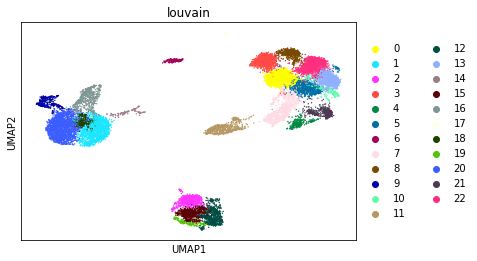

In [5]:
plt.figure(figsize=(10,10))
sc.pl.umap(anndata, color=["louvain"])

## 3.c. [10 pts] 
Quantitatively estimate the degree to which the bb-k-NNG removed the batch
effect using the F-statistic described above. Calculate the F statistic using the UMAP
solution derived from the original, non-batch balanced 12-k-NNG. Then calculate the F-statistic
using the bb-6-NNG to make the UMAP solution. Report both F-statistics. Do you see an
improvement in the batch correction using the bb-k-NNG?